In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

# 1. Data Importing

In [2]:
data = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
regions = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

# 2. Collecting information about the two dataset¶


In [3]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# 3. Joining the dataframes

In [8]:
merged = pd.merge(data, regions, on='NOC', how='left')
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Women in Athletics

We want to know how much medals we have only for women of the Winter Games:

Text(0.5, 1.0, 'Women medals')

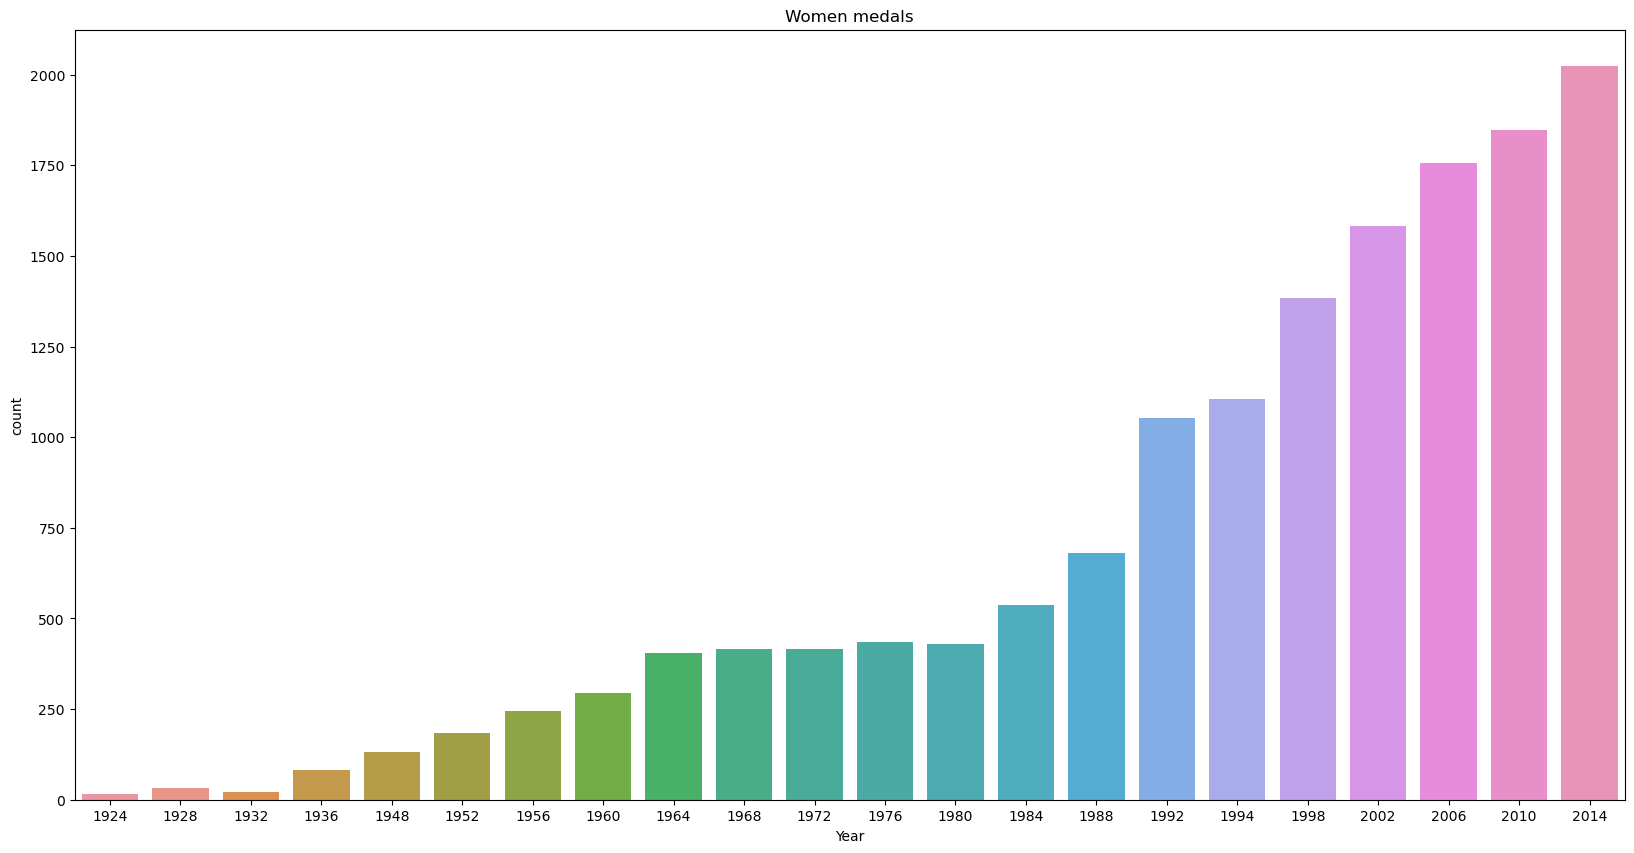

In [9]:
winterGames = merged[(merged.Sex == 'F') & (merged.Season == 'Winter')]
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=winterGames)
plt.title('Women medals')

# To see the percentage of participating ages:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Age', ylabel='Density'>

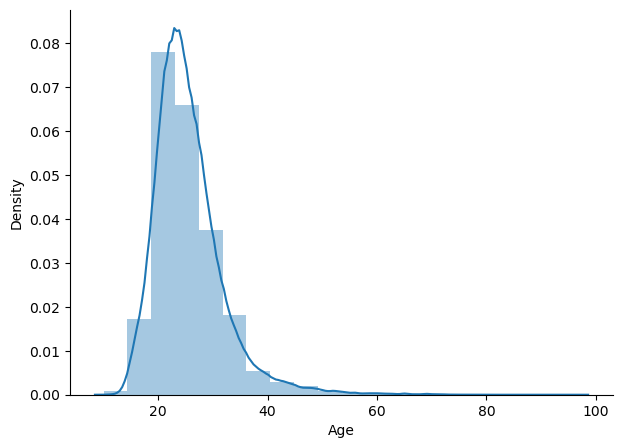

In [10]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(merged['Age'], bins=20)

# Top 3 countries:

Text(0.5, 1.0, 'Medals per Country')

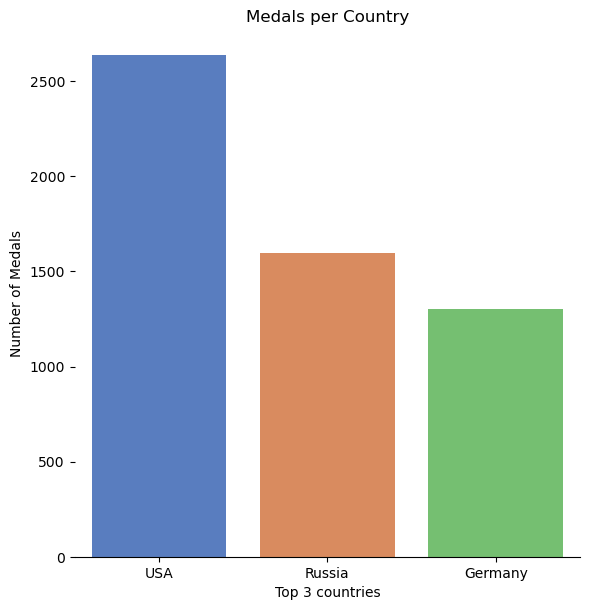

In [11]:
goldMedals = merged[(merged.Medal == 'Gold')]
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(3)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 3 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

# Medals per country:

In [12]:
goldMedals.region.value_counts().reset_index(name='Medal')

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
...,...,...
94,Bahrain,1
95,Grenada,1
96,Jordan,1
97,Vietnam,1


# Which countries WON the maximum Gold Medals in last held Olympic competitions?

<AxesSubplot:xlabel='Team'>

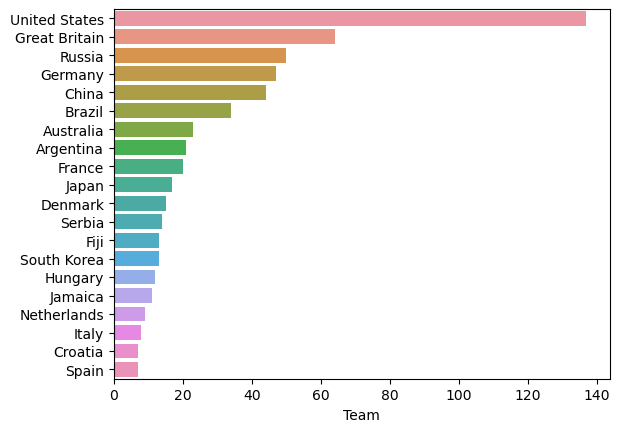

In [13]:
max_year = merged.Year.max()
team_list = merged[(merged.Year == max_year) & (merged.Medal=='Gold')].Team
team_list.value_counts().head(10)
sns.barplot(x=team_list.value_counts().head(20), y=team_list.value_counts().head(20).index)

# Which sport fetch the most gold medals?

In [14]:
US_Gold = merged[(merged.Year == max_year) & (merged.Medal=='Gold') & (merged.Team == 'United States')]
US_Gold = US_Gold[['Sport','Medal']].groupby('Sport').count()
US_Gold.reset_index(inplace=True)
Top_sports = US_Gold.sort_values('Medal', ascending=False)
Top_sports.head()

,Sport,Medal
8,Swimming,48
0,Athletics,27
1,Basketball,24
10,Water Polo,13
6,Rowing,9
